# Principal Component Analysis

In this exercise sheet we look into how to compute and apply a Principal Component Analysis (PCA).

## Toy 4D Example

We start by loading our toy example. The data is stored as a Numpy array, it is a $2585\times 5$ matrix. The last component of each row is the label, the first four components are the coordinates in 4D. Each label is an integer from  $\{0, 1, 2, 3, 4\}$.

The data contains a noisy 2D plane which is embded into 4D. We would like to represent the data in its _intrinsic_ 2D form.

In [61]:
#!pip install pillow  # install the Python package "pillow"
import numpy as np
import mllab.pca

Let us plot slices from this 4D data. We provide a helper function for this:

In [62]:
# Show documentation
#mllab.pca.plot_toy_slice?

We want to remove the noise and recover the 2D information.

### Task 3.1

Write an implementation of the function below. Use a singular value decomposition (SVD), but avoid computing it completely since we only need the first $q$ eigenvectors. Remember to sort the eigenvalues accordingly. You can use a NumPy/SciPy function for this. Note: It might not return ordered eigenvalues.

In [63]:
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

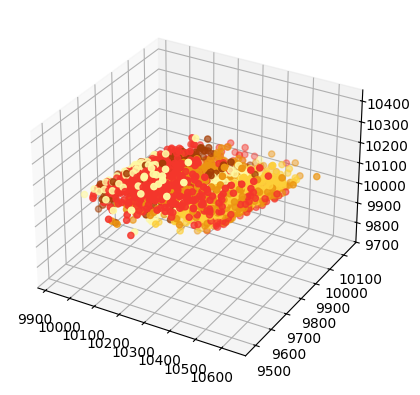

In [64]:
pca_toy_4d = np.load("data/pca_toy_4d.npy")
y = pca_toy_4d[:, -1]
x = pca_toy_4d[:, :-1]  

mllab.pca.plot_toy_slice(x, y, 1)

In [65]:
def pca(x, q):
   """
   Compute principal components and the coordinates.
   
   Parameters
   ----------
   
   x: (n, d) NumPy array
   q: int
      The number of principal components to compute.
      Has to be less than `p`.

   Returns
   -------
   
   Vq: (d, q) NumPy array, orthonormal vectors (column-wise)
   xq: (n, q) NumPy array, coordinates for x (row-wise)
   """
   mean = np.mean(x, axis=0)
   x_centered = x - mean

   # order is not guranteed 

   u, s, vt = svds(x_centered, k=q)
   
   idx = np.argsort(s)[::-1]
   s = s[idx]
   u = u[:, idx]
   vt = vt[idx, :]
   
   Vq = vt.T
   
   xq = x_centered @ Vq
   
   return Vq, xq

Now we can compute the 2D dimensional representation of `x` using PCA.

In [66]:
V, xq = pca(x, q=2)

### Task 3.2 a

And then plot the coordinates `xq`, which are two dimensional. We provide a helper function for this task. Let us check how to use it:

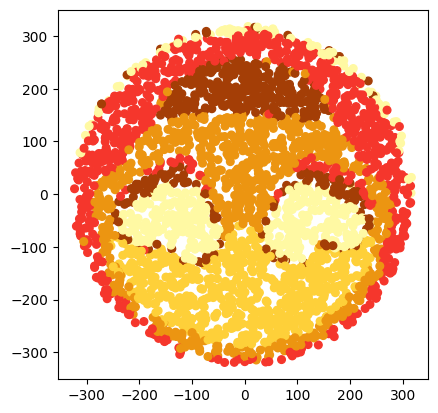

array([[  31.8581128 ,  279.72645544],
       [  39.16711702,  113.75430982],
       [ -75.29708517, -229.25619718],
       ...,
       [  27.65994262, -223.58610177],
       [ 231.2115893 ,   41.29916272],
       [ -50.68331915,  -26.20607126]])

In [67]:
#mllab.pca.plot_toy_2d?
mllab.pca.plot_toy_2d(xq, y)

Hopefully you appreciate the result.

### Task 3.2 b

Let us see how PCA handles a non-linear transformation. To test this we map our data into 3D by keeping the y-axis as the new z-axis and bending x-coordinate onto an ellipse.

In [68]:
#mllab.pca.map_on_ellipse?

In [69]:
xyz = mllab.pca.map_on_ellipse(xq, a=32, b=4, gap_angle=90)

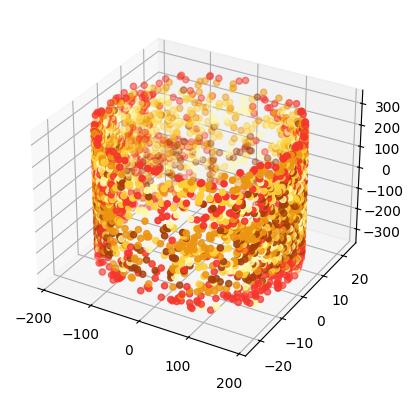

In [70]:
%matplotlib inline
mllab.pca.plot_toy_3d(xyz, y)

**(Remeber to stop the interactive plot by pressing the shutdown icon!)**

Now apply PCA to our transformed data and plot the result as before.

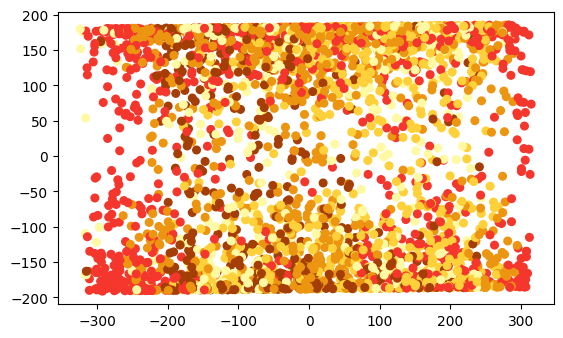

array([[ -80.60787003,  182.05277219],
       [  -9.37035874,  157.61822903],
       [  18.3250308 ,  113.04228657],
       ...,
       [ 113.79376818, -187.31963774],
       [ 195.56914562,  177.90011125],
       [ -35.21983231, -148.63131655]])

In [71]:
%matplotlib inline

V, xq = pca(xyz, 2)
mllab.pca.plot_toy_2d(xq, y)

Could be worse, but undeniably discomforting. Try different axes lengths and gap sizes of the ellipse, especially try increasing b. What do you observe?

### Task 3.3 a

We want to see if PCA can improve the accuracy of separating hyperlanes. First compute the singular values of the Iris dataset, then check how many percent of the variance the first two principal components capture.

In [72]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x = iris['data']
iris_y = iris['target']

### Task 3.3 b

Now apply PCA and compute the first two principal components. Plot the projected 2D data in a scatter plot such that the three labels are recognizable. What do you observe?

In [73]:
iris_x_centered = iris_x - np.mean(iris_x, axis=0)

# used numpy implementation of svd here instead of scipy since scipy doesnt let me compute all singular values for some reason
U, S, Vt = np.linalg.svd(iris_x_centered, full_matrices=False)

variances = S**2

total_variance = np.sum(variances)
first_component_percentage = variances[0] / total_variance * 100
first_two_components_percentage = (variances[0] + variances[1]) / total_variance * 100

print(f"Singular values: {S}")
print(f"Variances: {variances}")
print(f"Percentage of variance captured by first component: {first_component_percentage:.2f}%")
print(f"Percentage of variance captured by first two components: {first_two_components_percentage:.2f}%")

Singular values: [25.09996044  6.01314738  3.41368064  1.88452351]
Variances: [630.0080142   36.15794144  11.65321551   3.55142885]
Percentage of variance captured by first component: 92.46%
Percentage of variance captured by first two components: 97.77%


In [74]:
def plot_pca_2d(reduced_coordinates, labels, title="PCA of Iris Dataset"):
    """
    Create a 2D scatter plot of PCA-reduced data with color-coded labels.
    
    Parameters:
    -----------
    reduced_coordinates : numpy.ndarray, shape (n_samples, 2)
        The 2D coordinates after PCA reduction
    labels : numpy.ndarray, shape (n_samples,)
        The class labels for each data point
    title : str, optional
        The title for the plot
    """
    colors = ['blue', 'orange', 'green']
    markers = ['o', 's', '^']
    class_names = ['Setosa', 'Versicolor', 'Virginica']
    
    plt.figure(figsize=(10, 7))
    
    for i, class_name in enumerate(np.unique(labels)):
        idx = labels == class_name
        
        plt.scatter(
            reduced_coordinates[idx, 0],
            reduced_coordinates[idx, 1],
            c=colors[i],
            marker=markers[i],
            label=class_names[i],
            alpha=0.8,
            s=80
        )
    
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    
    plt.legend()
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

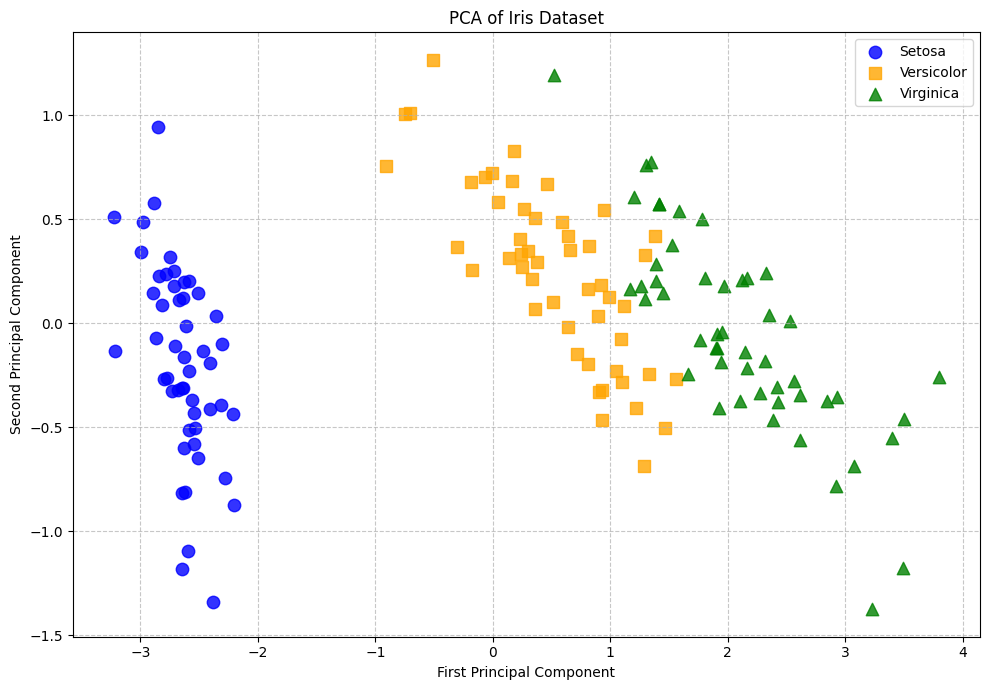

In [75]:
V, xq = pca(iris_x, 2)

plot_pca_2d(xq, iris_y)

In [76]:
def plot_1d_iris(a, b, c):
    """Show a 1D plot of three 1D datasets a, b and c.
    
    Top to bottom plotted in order is a, b, c."""
    af = a.flatten()
    bf = b.flatten()
    cf = c.flatten()
    left = min(x.min() for x in (af, bf, cf))
    right = max(x.max() for x in (af, bf, cf))
    for i, (x, cf) in enumerate(((af, 'red'), (bf, 'blue'), (cf, 'green'))):
        plt.hlines(i * .3, left, right, linestyles='dotted', colors=[(.8,.8,.8,1)])
        plt.eventplot(x, colors=cf, linewidths=.5, linelengths=.25, lineoffsets=(2 - i) * .3 )
    plt.axis('off')



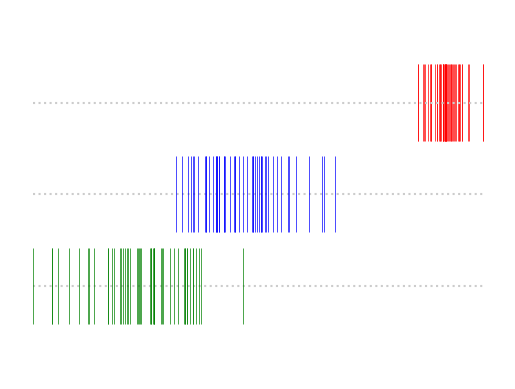

In [77]:
V, xq = pca(iris_x, 1)

xq_1d = xq.flatten() 

setosa_data = xq_1d[iris_y == 0]
versicolor_data = xq_1d[iris_y == 1]
virginica_data = xq_1d[iris_y == 2]

plot_1d_iris(setosa_data, versicolor_data, virginica_data)

### Task 3.3 c

Finally, recompute the accurancy as in sheet 1 and compare the results. Remember to separate the data into train and test set.

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [79]:
def labels(x1, x2):
    return np.concatenate((np.zeros(x1.shape[0], dtype='int'), np.ones(x2.shape[0], dtype='int')))

In [80]:
# very cool method from scipy I found
X_train, X_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size=0.3, random_state=42, stratify=iris_y)

for pca_dims in [4, 2, 1]:
    if pca_dims < 4:
        pca = PCA(n_components=pca_dims)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    else:
        X_train_pca = X_train
        X_test_pca = X_test

    # scipy implementation 
    classifier = OneVsRestClassifier(LinearSVC(random_state=42))
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"PCA {pca_dims}D, Accuracy: {accuracy:.4f}")
    
    # manual implementation
    binary_y_train_1 = (y_train == 0).astype(int)
    svm1 = LinearSVC(random_state=42)
    svm1.fit(X_train_pca, binary_y_train_1)
    
    # versicolor (1) vs. virginica (2), only for samples predicted as not setosa
    mask = y_train != 0  
    X_train_pca_2 = X_train_pca[mask]
    binary_y_train_2 = (y_train[mask] == 1).astype(int) 
    
    svm2 = LinearSVC(random_state=42)
    svm2.fit(X_train_pca_2, binary_y_train_2)
    
    predictions = np.zeros(X_test_pca.shape[0], dtype=int)
    
    # first predict setosa vs. rest
    is_setosa = svm1.predict(X_test_pca)
    predictions[is_setosa == 1] = 0  # Setosa
    
    # For non-setosa, predict versicolor vs. virginica
    non_setosa_indices = np.where(is_setosa == 0)[0]
    if len(non_setosa_indices) > 0:
        is_versicolor = svm2.predict(X_test_pca[non_setosa_indices])
        predictions[non_setosa_indices[is_versicolor == 1]] = 1
        predictions[non_setosa_indices[is_versicolor == 0]] = 2
    
    accuracy_manual = accuracy_score(y_test, predictions)
    print(f"PCA {pca_dims}D, Manual 2-SVM Approach, Accuracy: {accuracy_manual:.4f}")
    
    print()

PCA 4D, Accuracy: 0.9111
PCA 4D, Manual 2-SVM Approach, Accuracy: 0.9778

PCA 2D, Accuracy: 0.9333
PCA 2D, Manual 2-SVM Approach, Accuracy: 0.9111

PCA 1D, Accuracy: 0.9556
PCA 1D, Manual 2-SVM Approach, Accuracy: 0.9111



## Pedestrian Classification

### Task 3.4 a

__Read the pedestrian dataset into a NumPy array and normalize to [0,1]__

In [81]:
from mllab.pca import load_pedestrian_images

In [82]:
# mllab.pca.load_pedestrian_images?

train_pedestrian = load_pedestrian_images('train', True)
train_non_pedestrian = load_pedestrian_images('train', False)

test_pedestrian = load_pedestrian_images('test', True)
test_non_pedestrian = load_pedestrian_images('test', False)

X_train = np.vstack((train_pedestrian, train_non_pedestrian))
y_train = np.hstack((np.ones(len(train_pedestrian)), 
                     np.zeros(len(train_non_pedestrian))))

X_test = np.vstack((test_pedestrian, test_non_pedestrian))
y_test = np.hstack((np.ones(len(test_pedestrian)), 
                     np.zeros(len(test_non_pedestrian))))

X_train = X_train / 255.0
X_test = X_test / 255.0

n_train_samples = X_train.shape[0]
n_test_samples = X_test.shape[0]
height, width, channels = 100, 50, 3

# reshape from (n_samples, height, width, channels) to (n_samples, height*width*channels)
X_train_flat = X_train.reshape(n_train_samples, height * width * channels)
X_test_flat = X_test.reshape(n_test_samples, height * width * channels)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set shape: {X_train_flat.shape}")
print(f"Test set shape: {X_test_flat.shape}")

Training set shape: (2000, 100, 50, 3)
Test set shape: (1000, 100, 50, 3)
Training set shape: (2000, 15000)
Test set shape: (1000, 15000)


### Task 3.4 b

__Write a function to plot an image__

In [83]:
def plot_im(image, ax=None, vmin=0, vmax=1):
    """
    Plot an image with consistent contrast.
    
    Parameters:
    -----------
    image : numpy.ndarray
        Image array with shape (height, width, channels)
    ax : matplotlib.axes.Axes, optional
        Axes on which to draw the image
    vmin : float, default=0
        Minimum value for color scaling
    vmax : float, default=1
        Maximum value for color scaling
    """
    if ax is None:
        ax = plt.gca()
    
    ax.imshow(image, vmin=vmin, vmax=vmax)
    ax.axis('off')
    
    return ax

__Plot 10 randomly chosen images showing a pedestrian, and 10 randomly chosen images not showing a pedestrain.__

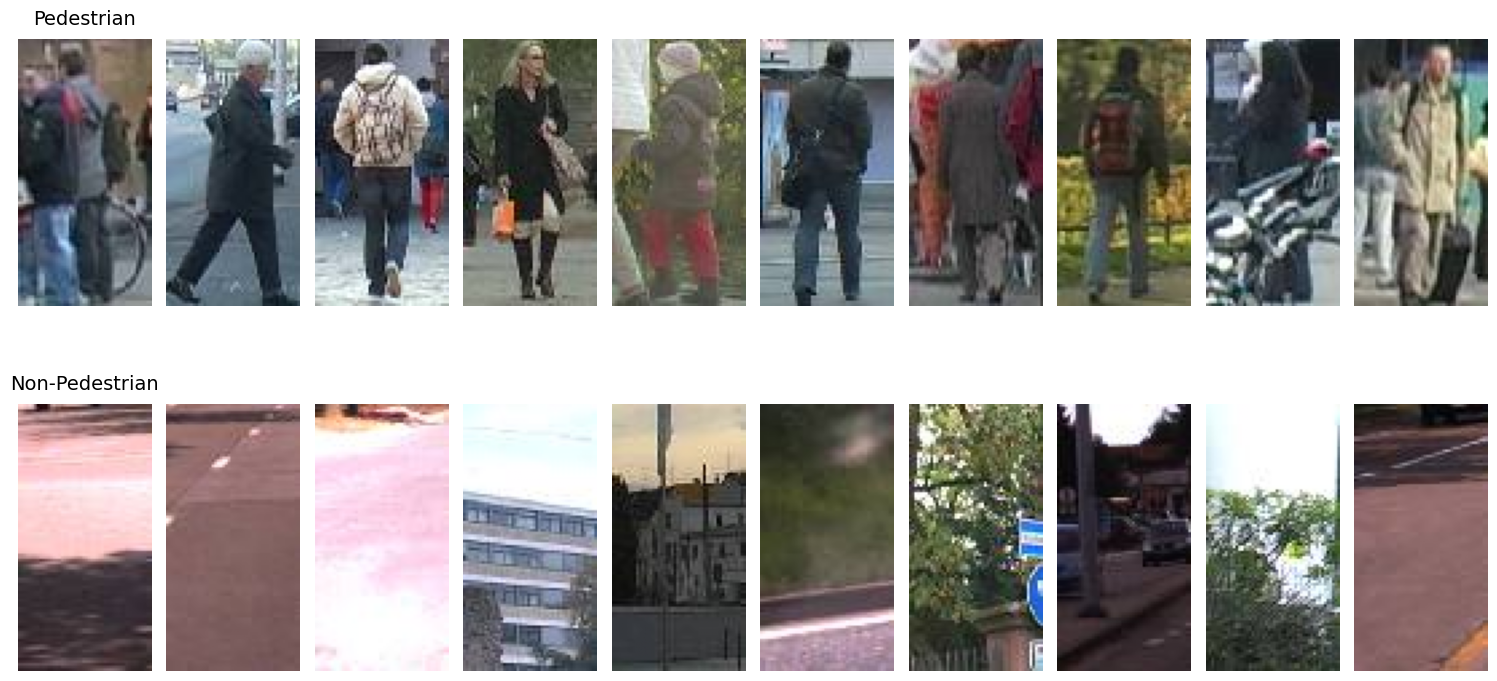

In [84]:
plt.figure(figsize=(15, 8))

# Plot 10 random pedestrian images
pedestrian_indices = np.random.choice(len(train_pedestrian), size=10, replace=False)
for i, idx in enumerate(pedestrian_indices):
    ax = plt.subplot(2, 10, i+1)
    plot_im(train_pedestrian[idx] / 255.0, ax=ax)
    if i == 0:
        ax.set_title("Pedestrian", fontsize=14, pad=10)

# Plot 10 random non-pedestrian images
non_pedestrian_indices = np.random.choice(len(train_non_pedestrian), size=10, replace=False)
for i, idx in enumerate(non_pedestrian_indices):
    ax = plt.subplot(2, 10, i+11)
    plot_im(train_non_pedestrian[idx] / 255.0, ax=ax)
    if i == 0:
        ax.set_title("Non-Pedestrian", fontsize=14, pad=10)

plt.tight_layout()
plt.show()

### Task 3.5 a

__Compute the PCA of the full training set for $q=200$__

In [85]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=200)
pca.fit(X_train_flat)

eigenpedestrians = pca.components_

### Task 3.5 b

__Plot the eigenpedestrian 1-20, 51-60, and 111-120__

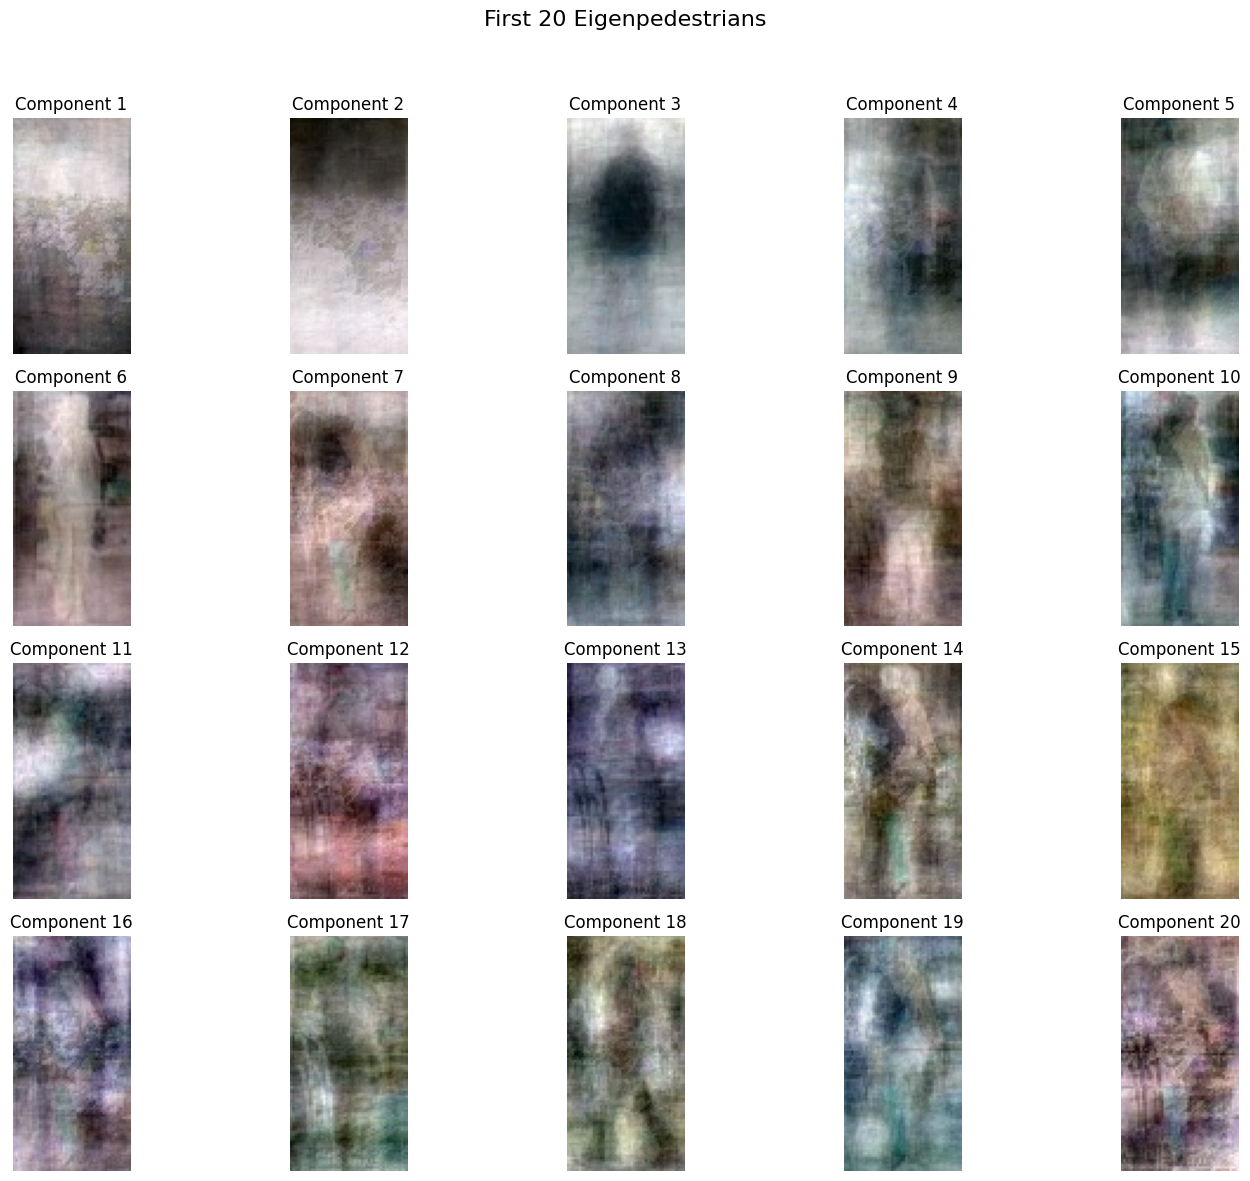

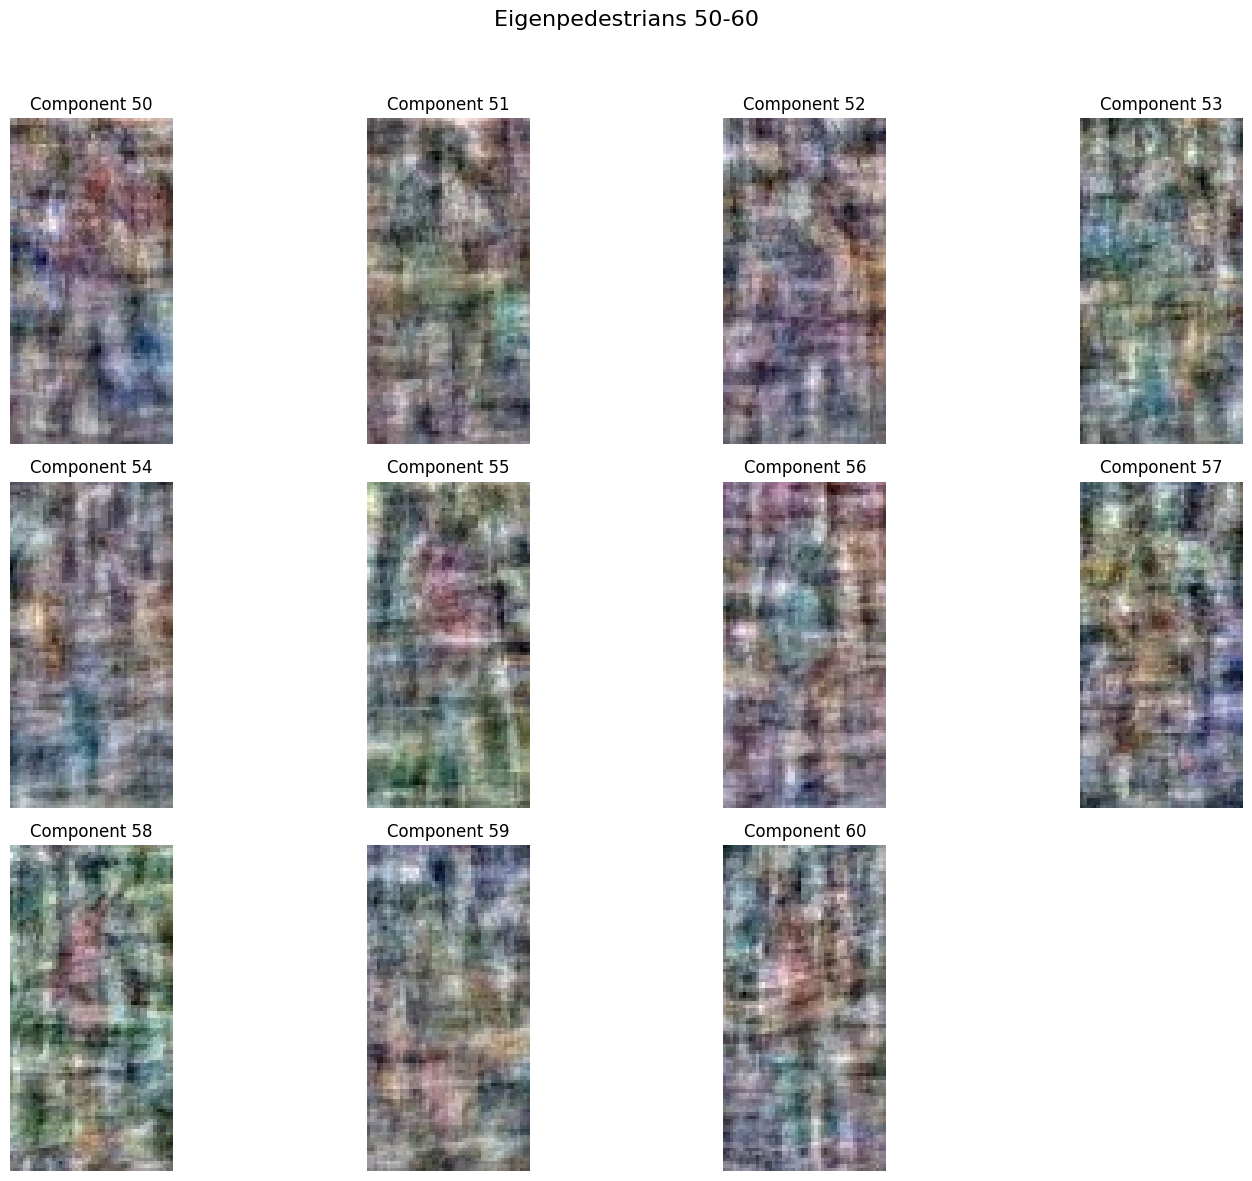

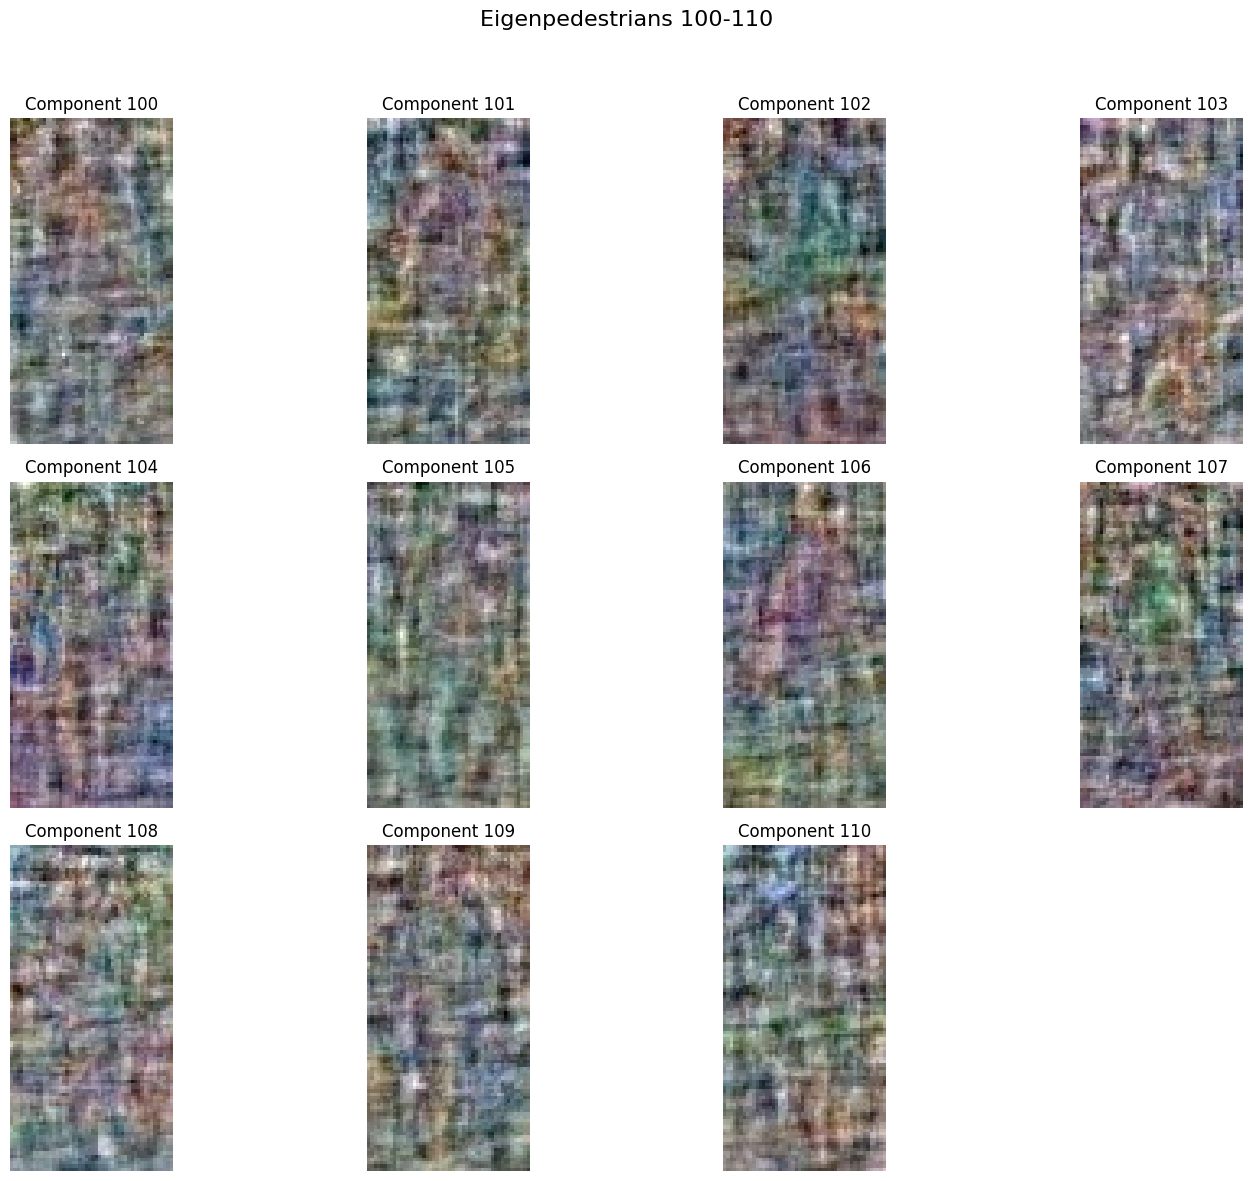

In [86]:
def plot_eigenpedestrians(eigenpedestrians, indices, title, rows=4, cols=5):
    """
    Plot a set of eigenpedestrians.
    
    Parameters:
    -----------
    eigenpedestrians : numpy.ndarray
        Array of eigenpedestrians with shape (n_components, n_features)
    indices : list
        Indices of eigenpedestrians to plot
    title : str
        Title for the plot
    rows, cols : int
        Number of rows and columns for the subplot grid
    """
    plt.figure(figsize=(15, 12))
    plt.suptitle(title, fontsize=16)
    
    # Original image dimensions
    height, width, channels = 100, 50, 3
    
    for i, idx in enumerate(indices):
        if i >= rows * cols:
            break
            
        eigenpedestrian = eigenpedestrians[idx].reshape(height, width, channels)
        
        eigen_min = eigenpedestrian.min()
        eigen_max = eigenpedestrian.max()
        if eigen_max > eigen_min: 
            eigenpedestrian = (eigenpedestrian - eigen_min) / (eigen_max - eigen_min)
        
        ax = plt.subplot(rows, cols, i + 1)
        plot_im(eigenpedestrian, ax=ax)
        ax.set_title(f"Component {idx+1}")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

plot_eigenpedestrians(eigenpedestrians, range(20), 
                      "First 20 Eigenpedestrians", rows=4, cols=5)

plot_eigenpedestrians(eigenpedestrians, range(49, 60), 
                     "Eigenpedestrians 50-60", rows=3, cols=4)

plot_eigenpedestrians(eigenpedestrians, range(99, 110), 
                     "Eigenpedestrians 100-110", rows=3, cols=4)

### Task 3.6

__Compute the scores for a linear SVM using increasing numbers of principal components__

Use 10 to 200 components in steps of 5. Train the linear SVM with $C=0.01$ and increse the maximum number of iterations for the solver. You can reuse the computed PCA from above.

In [87]:
from sklearn.svm import LinearSVC

In [88]:
max_q = 200
pca_full = PCA(n_components=max_q)
pca_full.fit(X_train_flat)

X_train_pca_full = pca_full.transform(X_train_flat)
X_test_pca_full = pca_full.transform(X_test_flat)

q_values = list(range(10, 201, 5))

train_scores = []
test_scores = []

for q in q_values:
    print(f"Processing q = {q}...")
    
    X_train_pca_q = X_train_pca_full[:, :q]
    X_test_pca_q = X_test_pca_full[:, :q]
    
    svm = LinearSVC(C=0.01, random_state=42, max_iter=10000)
    svm.fit(X_train_pca_q, y_train)
    
    train_pred = svm.predict(X_train_pca_q)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)
    
    test_pred = svm.predict(X_test_pca_q)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_scores.append(test_accuracy)
    
    print(f"  Training accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")

Processing q = 10...
  Training accuracy: 0.8075
  Test accuracy: 0.8140
Processing q = 15...
  Training accuracy: 0.8135
  Test accuracy: 0.8270
Processing q = 20...
  Training accuracy: 0.8220
  Test accuracy: 0.8350
Processing q = 25...
  Training accuracy: 0.8245
  Test accuracy: 0.8300
Processing q = 30...
  Training accuracy: 0.8200
  Test accuracy: 0.8300
Processing q = 35...
  Training accuracy: 0.8250
  Test accuracy: 0.8550
Processing q = 40...
  Training accuracy: 0.8725
  Test accuracy: 0.8400
Processing q = 45...
  Training accuracy: 0.8720
  Test accuracy: 0.8560
Processing q = 50...
  Training accuracy: 0.8835
  Test accuracy: 0.8240
Processing q = 55...
  Training accuracy: 0.8975
  Test accuracy: 0.8210
Processing q = 60...
  Training accuracy: 0.9145
  Test accuracy: 0.8080
Processing q = 65...
  Training accuracy: 0.9080
  Test accuracy: 0.8000
Processing q = 70...
  Training accuracy: 0.9105
  Test accuracy: 0.8110
Processing q = 75...
  Training accuracy: 0.9195
  

Plot the training and test scores over $q$.

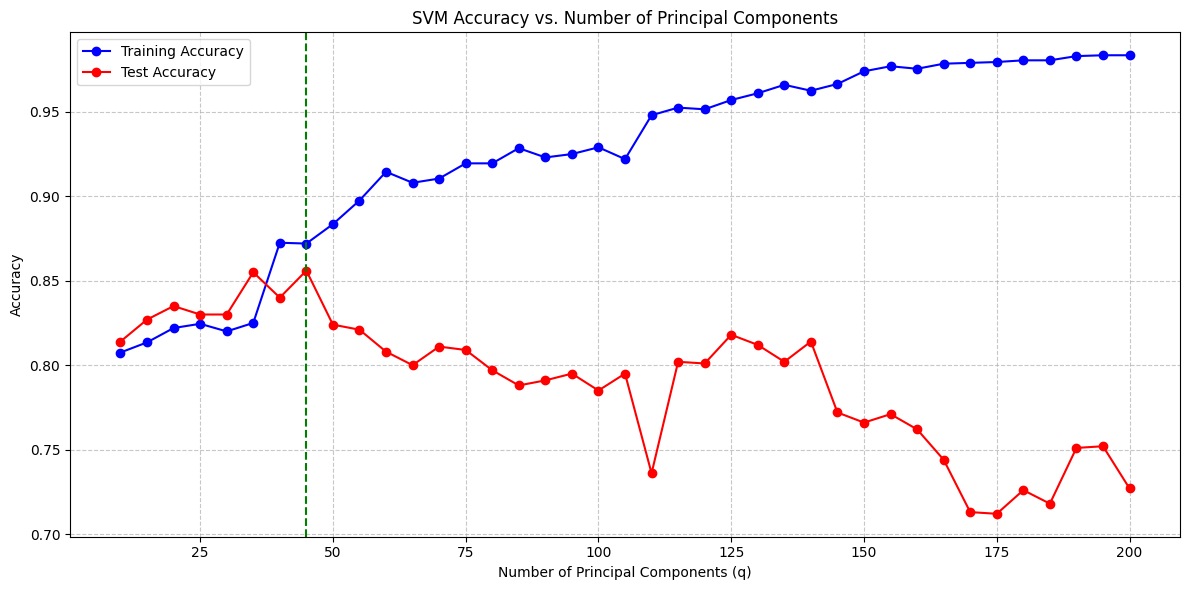

Best q value: 45 with test accuracy: 0.8560


In [89]:
plt.figure(figsize=(12, 6))
plt.plot(q_values, train_scores, 'o-', label='Training Accuracy', color='blue')
plt.plot(q_values, test_scores, 'o-', label='Test Accuracy', color='red')
plt.xlabel('Number of Principal Components (q)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Number of Principal Components')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

best_q_idx = np.argmax(test_scores)
best_q = q_values[best_q_idx]
best_score = test_scores[best_q_idx]
plt.axvline(x=best_q, color='green', linestyle='--')

plt.show()

print(f"Best q value: {best_q} with test accuracy: {best_score:.4f}")

### Task 3.7

## HOG Features

We decided to provide the implementation of the HOG features. (Task 3.7 a). 

Bonus Task (only 3.7 b): Compute the HOG features of the test data. Then apply PCA and calculate the scores

In [90]:
import scipy.ndimage as ndimage
from numpy.linalg import norm
from scipy.ndimage.filters import convolve


class HogFeatures:
    def __init__(self, im_shape, n_bins=9, cell_size=8, blk_size=2, unsigned=True, clip_val=.2):
        self.deg_range = np.pi if unsigned else 2 * np.pi
        self.n_bins = n_bins
        self.bins = np.linspace(0, self.deg_range, n_bins, endpoint=False)
        self.bin_size = self.deg_range / n_bins
        self.cell_size = cell_size
        self.blk_size = blk_size
        self.clip_val = clip_val

        self.im_h, self.im_w = im_shape
        x, y = np.arange(self.im_w), np.arange(self.im_h)
        
        # Compute logical cell indices of next lower and upper cell
        # w.r.t. to the cell center
        cells_x = np.arange(-cell_size, self.im_w - (cell_size + 1)/2, cell_size)
        self.n_cells_x = len(cells_x) - (2 if cells_x[-1] >= self.im_w else 1)
        x0 = np.digitize(x, cells_x + cell_size / 2) - 2
        Xc = ((x0 + 1) - .5) * cell_size - .5
        f_x = (x - Xc) / cell_size

        cells_y = np.arange(-cell_size, self.im_h - (cell_size + 1)/2, cell_size)
        self.n_cells_y = len(cells_y) - (2 if cells_y[-1] >= self.im_h else 1)
        y0 = np.digitize(y, cells_y + cell_size / 2) - 2
        Yc = ((y0 + 1) - .5) * cell_size - .5
        f_y = (y - Yc) / cell_size
        
        self.f_x, self.f_y = np.meshgrid(f_x, f_y)
    
    def extract(self, im):
        """
        Extract the HOG features for a image.
        
        Parameters
        ----------
        
        im: ndarray
            An array of shape (height, width, 3).
        """
        im = np.rollaxis(im.reshape(self.im_h, self.im_w, -1), 2)
        dx = convolve(im, [[[1,0,-1]]], mode='constant')
        dy = convolve(im, [[[-1],[0],[1]]], mode='constant')
        grads_mag = norm(np.stack((dx, dy), axis=-1), axis=3)
        max_grads = np.argmax(np.rollaxis(grads_mag, 0, 3), 2)
        Y, X = np.ogrid[:grads_mag.shape[1], :grads_mag.shape[2]]
        grads_dir = np.arctan2(dy[max_grads, Y, X], dx[max_grads, Y, X]) % self.deg_range
        grads_mag = grads_mag[max_grads, Y, X]
        del dx, dy, max_grads, Y, X
        
        # Compute logical bin indices of next lower (<=) and upper bin (>)
        # w.r.t. to the bin center
        bin0 = np.digitize(grads_dir, self.bins + .5 * self.bin_size) - 1
        bin1 = bin0 + 1
        dirc = (bin0 + .5) * self.bin_size
        f_b = (grads_dir - dirc) / self.bin_size
        del grads_dir
        
        bin0 %= self.n_bins
        bin1 %= self.n_bins
        
        f_x, f_y = self.f_x, self.f_y

        hist = np.zeros((self.n_cells_y, self.n_cells_x, self.n_bins))
        bin_labels = np.arange(self.n_bins)
        # Iterate over all cells
        for ci_x in range(self.n_cells_x):
            x_pos = (ci_x * self.cell_size - (self.cell_size + 1) // 2, ci_x * self.cell_size + (self.cell_size + 1) // 2)
            x_pre = slice(max(0, x_pos[0] + self.cell_size), max(0, x_pos[1] + self.cell_size))
            x_pos = slice(max(0, x_pos[0]), x_pos[1])
            for ci_y in range(self.n_cells_y):
                y_pos = (ci_y * self.cell_size - (self.cell_size + 1) // 2, ci_y * self.cell_size + (self.cell_size + 1) // 2)
                y_pre = slice(max(0, y_pos[0] + self.cell_size), max(0, y_pos[1] + self.cell_size))
                y_pos = slice(max(0, y_pos[0]), y_pos[1])
                # Consider all four sourinding cells
                    
                # y-pre x-pre
                m = (y_pre, x_pre)
                g = grads_mag[m] * (1 - f_x[m]) * (1 - f_y[m])
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pos x-pre
                m = (y_pos, x_pre)
                g = grads_mag[m] * (1 - f_x[m]) * f_y[m]
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pre x-pos
                m = (y_pre, x_pos)
                g = grads_mag[m] * f_x[m] * (1 - f_y[m])
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pos x-pos
                m = (y_pos, x_pos)
                g = grads_mag[m] * f_x[m] * f_y[m]
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
        
        n_blks_x = self.n_cells_x + 1 - self.blk_size
        n_blks_y = self.n_cells_y + 1 - self.blk_size
        features = np.zeros((n_blks_x, n_blks_y, self.blk_size ** 2 * self.n_bins))
        for bi_x in range(n_blks_x):
            for bi_y in range(n_blks_y):
                blk = hist[bi_y:bi_y+self.blk_size, bi_x:bi_x+self.blk_size].copy()
                blk_norm = norm(blk.flatten())
                if blk_norm > 0:
                    blk /= blk_norm
                np.clip(blk, None, self.clip_val, out=blk)
                blk_norm = norm(blk.flatten())
                if blk_norm > 0:
                    blk /= blk_norm
                features[bi_x, bi_y] = blk.ravel()
        return features.flatten()


/tmp/ipykernel_3518/2204357547.py:3: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


To test you Python implementation we provide some intermediate steps. The array `image` is the input, and `steps` contains the values of the inner variables of the HOG algorithm. The image is grayscale.

In [91]:
# didnt do bonus exercise
image, steps = mllab.pca.hog_test_data()

Number of bins: 9
Cell size: 8
Block size: 2
Unsigned directions: True
Clip value: 0.2


In [92]:
# Use Python implementation
hog = HogFeatures((100, 50))
print("Use Python implementation")

Use Python implementation


__Compute the HOG features for the training data, then compute the PCA for $q=200$.__

In [93]:
! pip install tqdm
from tqdm import tqdm

# use data that I prepared above

int_train_features = X_train
int_test_features = X_test

hog_train_features = []

for i in tqdm(range(int_train_features.shape[0])):
    im = int_train_features[i].reshape(100, 50, 3)
    hog_train_features.append(hog.extract(im))
print("Computed HoG.")

q = 200
hog_train_features = np.array(hog_train_features)
hog_train_pca = PCA(n_components=q)
hog_train_pca.fit(hog_train_features)

100%|██████████| 2000/2000 [00:14<00:00, 136.15it/s]


Computed HoG.


PCA(n_components=200)

__Compute and plot the scores as above, but this time use the HOG features.__

In [94]:
hog_test_features = []
for i in tqdm(range(int_test_features.shape[0])):
    im = int_test_features[i].reshape(100, 50, 3)
    hog_test_features.append(hog.extract(im))
print("Computed HoG for test data.")

hog_test_features = np.array(hog_test_features)

100%|██████████| 1000/1000 [00:07<00:00, 136.99it/s]

Computed HoG for test data.


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

train_labels = y_train
test_labels = y_test

q_values = list(range(10, 201, 5))

train_scores = []
test_scores = []

for q in q_values:
    print(f"Processing q = {q}...")
    
    hog_train_pca_q = hog_train_pca.transform(hog_train_features)[:, :q]
    hog_test_pca_q = hog_train_pca.transform(hog_test_features)[:, :q]
    
    svm = LinearSVC(C=0.01, random_state=42, max_iter=10000)
    svm.fit(hog_train_pca_q, train_labels)
    
    train_pred = svm.predict(hog_train_pca_q)
    train_accuracy = accuracy_score(train_labels, train_pred)
    train_scores.append(train_accuracy)
    
    test_pred = svm.predict(hog_test_pca_q)
    test_accuracy = accuracy_score(test_labels, test_pred)
    test_scores.append(test_accuracy)
    
    print(f"  Training accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")


Processing q = 10...
  Training accuracy: 0.9525
  Test accuracy: 0.8860
Processing q = 15...
  Training accuracy: 0.9620
  Test accuracy: 0.9160
Processing q = 20...
  Training accuracy: 0.9810
  Test accuracy: 0.8770
Processing q = 25...
  Training accuracy: 0.9790
  Test accuracy: 0.8780
Processing q = 30...
  Training accuracy: 0.9765
  Test accuracy: 0.8690
Processing q = 35...
  Training accuracy: 0.9775
  Test accuracy: 0.8690
Processing q = 40...
  Training accuracy: 0.9790
  Test accuracy: 0.8700
Processing q = 45...
  Training accuracy: 0.9785
  Test accuracy: 0.8690
Processing q = 50...
  Training accuracy: 0.9830
  Test accuracy: 0.9130
Processing q = 55...
  Training accuracy: 0.9820
  Test accuracy: 0.9130
Processing q = 60...
  Training accuracy: 0.9815
  Test accuracy: 0.9130
Processing q = 65...
  Training accuracy: 0.9810
  Test accuracy: 0.9120
Processing q = 70...
  Training accuracy: 0.9815
  Test accuracy: 0.9120
Processing q = 75...
  Training accuracy: 0.9815
  

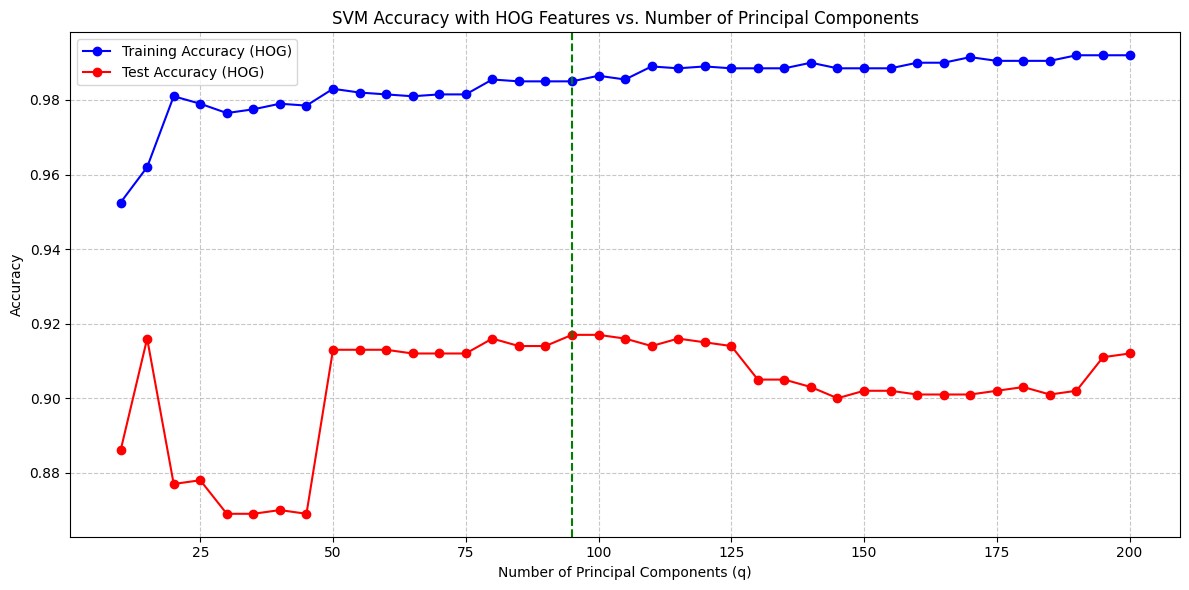

Best q value with HOG: 95 with test accuracy: 0.9170


In [96]:
plt.figure(figsize=(12, 6))
plt.plot(q_values, train_scores, 'o-', label='Training Accuracy (HOG)', color='blue')
plt.plot(q_values, test_scores, 'o-', label='Test Accuracy (HOG)', color='red')
plt.xlabel('Number of Principal Components (q)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy with HOG Features vs. Number of Principal Components')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

best_q_idx = np.argmax(test_scores)
best_q = q_values[best_q_idx]
best_score = test_scores[best_q_idx]
plt.axvline(x=best_q, color='green', linestyle='--')

plt.show()

print(f"Best q value with HOG: {best_q} with test accuracy: {best_score:.4f}")